In [ ]:
# import numpy as np

# class NeuralNetwork:
#     def __init__(self, N, neurons, lr, activation, weight_init, epochs, batch_size):
#         self.N = N
#         self.neurons = neurons
#         self.lr = lr
#         self.activation = activation
#         self.weight_init = weight_init
#         self.epochs = epochs
#         self.batch_size = batch_size
        
#         # Initialize weights and biases
#         self.weights = []
#         self.biases = []
#         for i in range(N - 1):
#             weight_matrix = self.weight_init((neurons[i], neurons[i + 1]))
#             bias_vector = np.zeros((1, neurons[i + 1]))
#             self.weights.append(weight_matrix)
#             self.biases.append(bias_vector)
        
#     def _activate(self, x):
#         if self.activation == 'relu':
#             return np.maximum(0, x)
#         elif self.activation == 'sigmoid':
#             return 1 / (1 + np.exp(-x))
#         elif self.activation == 'tanh':
#             return np.tanh(x)
#         # Add more activation functions as needed
    
#     def _activate_derivative(self, x):
#         if self.activation == 'relu':
#             return np.where(x > 0, 1, 0)
#         elif self.activation == 'sigmoid':
#             sig = 1 / (1 + np.exp(-x))
#             return sig * (1 - sig)
#         elif self.activation == 'tanh':
#             return 1 - np.tanh(x) ** 2
#         # Add more derivative functions as needed
    
#     def fit(self, X, Y):
#         for epoch in range(self.epochs):
#             for start in range(0, len(X), self.batch_size):
#                 end = start + self.batch_size
#                 batch_X = X[start:end]
#                 batch_Y = Y[start:end]
                
#                 # Forward pass
#                 activations = [batch_X]
#                 for w, b in zip(self.weights, self.biases):
#                     z = np.dot(activations[-1], w) + b
#                     a = self._activate(z)
#                     activations.append(a)
                
#                 # Backward pass
#                 # Calculating gradients would go here
                
#                 # Update weights and biases with gradients
                
#     def predict(self, X):
#         a = X
#         for w, b in zip(self.weights, self.biases):
#             z = np.dot(a, w) + b
#             a = self._activate(z)
#         return np.argmax(a, axis=1)
    
#     def predict_proba(self, X):
#         a = X
#         for w, b in zip(self.weights, self.biases):
#             z = np.dot(a, w) + b
#             a = self._activate(z)
#         return a
    
#     def score(self, X, Y):
#         predictions = self.predict(X)
#         return np.mean(predictions == Y)

# # Example usage:
# # nn = NeuralNetwork(N=3, neurons=[4, 5, 3], lr=0.01, activation='relu', weight_init=np.random.randn, epochs=100, batch_size=32)
# # nn.fit(X_train, Y_train)
# # accuracy = nn.score(X_test, Y_test)


In [ ]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_grad(x):
    sig = sigmoid(x)
    return sig * (1 - sig)

def tanh(x):
    return np.tanh(x)

def tanh_grad(x):
    return 1 - np.tanh(x) ** 2

def relu(x):
    return np.maximum(0, x)

def relu_grad(x):
    return (x > 0).astype(float)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

def leaky_relu_grad(x, alpha=0.01):
    return np.where(x > 0, 1, alpha)

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)


In [2]:
import numpy as np

class NeuralNetwork:
    def __init__(self, N, layers, lr, activations, weight_init, epochs, batch_size):
        self.N = N
        self.layers = layers
        self.lr = lr
        self.activations = activations
        self.weight_init = weight_init
        self.epochs = epochs
        self.batch_size = batch_size
        self.weights, self.biases = self.initialize_weights()
    
    def initialize_weights(self):
        weights = []
        biases = []
        for i in range(1, self.N):
            input_dim = self.layers[i-1]
            output_dim = self.layers[i]
            weights.append(self.init_weight(input_dim, output_dim))
            biases.append(np.zeros((1, output_dim)))
        return weights, biases

    def init_weight(self, input_dim, output_dim):
        if self.weight_init == "zero":
            return np.zeros((input_dim, output_dim))
        elif self.weight_init == "random":
            return np.random.rand(input_dim, output_dim) * 0.01
        elif self.weight_init == "normal":
            return np.random.normal(0, 1, (input_dim, output_dim)) / np.sqrt(input_dim)
    
    def fit(self, X, Y):
        for epoch in range(self.epochs):
            permutation = np.random.permutation(X.shape[0])
            X_shuffled = X[permutation]
            Y_shuffled = Y[permutation]
            
            for i in range(0, X.shape[0], self.batch_size):
                X_batch = X_shuffled[i:i + self.batch_size]
                Y_batch = Y_shuffled[i:i + self.batch_size]
                
                activations, pre_activations = self.forward_pass(X_batch)
                self.backward_pass(Y_batch, activations, pre_activations)

    def forward_pass(self, X):
        activations = [X]
        pre_activations = []
        for i in range(self.N - 1):
            Z = activations[-1].dot(self.weights[i]) + self.biases[i]
            pre_activations.append(Z)

            # Print shape for debugging purposes
            # print(f"Layer {i+1}: pre-activation shape: {Z.shape}")

            if i == self.N - 2:
                A = softmax(Z)  # Last layer uses softmax
            else:
                A = self.activate(Z, self.activations[i])
            
            activations.append(A)
            # print(f"Layer {i+1}: activation shape: {A.shape}")
        
        return activations, pre_activations

    def activate(self, x, activation):
        if activation == "sigmoid":
            return sigmoid(x)
        elif activation == "tanh":
            return tanh(x)
        elif activation == "relu":
            return relu(x)
        elif activation == "leaky_relu":
            return leaky_relu(x)
    
    def activate_grad(self, x, activation):
        if activation == "sigmoid":
            return sigmoid_grad(x)
        elif activation == "tanh":
            return tanh_grad(x)
        elif activation == "relu":
            return relu_grad(x)
        elif activation == "leaky_relu":
            return leaky_relu_grad(x)

    def backward_pass(self, Y, activations, pre_activations):
        m = Y.shape[0]
        deltas = [None] * (self.N - 1)
        
        # Compute the error for the last layer
        deltas[-1] = activations[-1] - Y
        
        for i in range(self.N - 3, -1, -1):
            dZ = deltas[i + 1].dot(self.weights[i + 1].T) * self.activate_grad(pre_activations[i], self.activations[i])
            deltas[i] = dZ
        
        for i in range(self.N - 1):
            dW = activations[i].T.dot(deltas[i]) / m
            dB = np.sum(deltas[i], axis=0, keepdims=True) / m
            self.weights[i] -= self.lr * dW
            self.biases[i] -= self.lr * dB

    def predict_proba(self, X):
        activations, _ = self.forward_pass(X)
        return activations[-1]
    
    def predict(self, X):
        probabilities = self.predict_proba(X)
        return np.argmax(probabilities, axis=1)
    
    def score(self, X, Y):
        predictions = self.predict(X)
        true_labels = np.argmax(Y, axis=1) if Y.ndim > 1 else Y
        accuracy = np.mean(predictions == true_labels)
        return accuracy


In [1]:
import numpy as np
import struct
import os
import pandas as pd
from PIL import Image

# Define functions for reading IDX files
def read_idx3_ubyte(filename):
    with open(filename, 'rb') as f:
        magic = struct.unpack('>I', f.read(4))[0]
        num_images = struct.unpack('>I', f.read(4))[0]
        num_rows = struct.unpack('>I', f.read(4))[0]
        num_cols = struct.unpack('>I', f.read(4))[0]
        image_data = np.fromfile(f, dtype=np.uint8).reshape(num_images, num_rows, num_cols)
    return image_data

def read_idx1_ubyte(filename):
    with open(filename, 'rb') as f:
        magic = struct.unpack('>I', f.read(4))[0]
        num_labels = struct.unpack('>I', f.read(4))[0]
        labels = np.fromfile(f, dtype=np.uint8)
    return labels

# Function to save images and create a CSV file
def save_images_and_labels(images, labels, output_folder, csv_filename):
    os.makedirs(output_folder, exist_ok=True)
    image_filenames = []

    for i in range(images.shape[0]):
        image = images[i]
        label = labels[i]
        
        # Save image as PNG
        image_name = f"image_{i}.png"
        image_path = os.path.join(output_folder, image_name)
        Image.fromarray(image).convert("L").save(image_path)

        # Append to list for CSV
        image_filenames.append((image_name, label))

    # Create a DataFrame and save to CSV
    df = pd.DataFrame(image_filenames, columns=['filename', 'label'])
    df.to_csv(csv_filename, index=False)



In [ ]:
train_images_file = 'train-images.idx3-ubyte'
train_labels_file = 'train-labels.idx1-ubyte'
output_folder = 'train_images'
csv_filename = 'train_images_labels.csv'

# Load images and labels
train_images = read_idx3_ubyte(train_images_file)
train_labels = read_idx1_ubyte(train_labels_file)

# Save images and labels
save_images_and_labels(train_images, train_labels, output_folder, csv_filename)

print(f"Saved training images to '{output_folder}' and labels to '{csv_filename}'.")

Saved training images to 'train_images' and labels to 'train_images_labels.csv'.


In [4]:
# Specify file paths for test data
test_images_file = 't10k-images.idx3-ubyte'
test_labels_file = 't10k-labels.idx1-ubyte'
test_output_folder = 'test_images'
test_csv_filename = 'test_images_labels.csv'

# Load test images and labels
test_images = read_idx3_ubyte(test_images_file)
test_labels = read_idx1_ubyte(test_labels_file)

# Save test images and labels
save_images_and_labels(test_images, test_labels, test_output_folder, test_csv_filename)

print(f"Saved test images to '{test_output_folder}' and labels to '{test_csv_filename}'.")


Saved test images to 'test_images' and labels to 'test_images_labels.csv'.


In [3]:
import pandas as pd

file_path = 'train_images_labels.csv'
df = pd.read_csv(file_path)

In [4]:
df.shape

(60000, 2)

In [17]:
df.isnull().sum()

filename    0
label       0
dtype: int64

In [5]:
import os
import numpy as np
import pandas as pd
from PIL import Image

# Resize shape for the images
resize_shape = (28, 28)

# Initialize lists to store paths, labels, and images
paths = []
labels = []
images = []

# Walk through the image directory
image_directory = './train_images'  # Update this path to your image directory
for dirname, _, filenames in os.walk(image_directory):
    for filename in filenames:
        image_path = os.path.join(dirname, filename)
        label = filename  # Get label from the filename without extension
        try:
            # Open and resize the image
            image = Image.open(image_path)
            image = image.resize(resize_shape)

            # Convert the image to a numpy array
            image_array = np.array(image)

            # Append to lists
            paths.append(image_path)
            labels.append(label)
            images.append(image_array)
        except Exception as e:
            print(f"Error processing {image_path}: {e}")

print('Dataset is loaded')

# Load the labels from CSV
labels_df = pd.read_csv('./train_images_labels.csv')  # Update this path to your CSV file

# Create a DataFrame with image paths and their arrays
image_df = pd.DataFrame({'filename': labels, 'image_path': paths, 'resized_img': images})

# Merge the image paths with the labels DataFrame
merged_df = pd.merge(labels_df, image_df, on='filename', how='inner')

# Display the first few rows of the merged DataFrame
print(merged_df.head())


Dataset is loaded
      filename  label                  image_path  \
0  image_0.png      5  ./train_images\image_0.png   
1  image_1.png      0  ./train_images\image_1.png   
2  image_2.png      4  ./train_images\image_2.png   
3  image_3.png      1  ./train_images\image_3.png   
4  image_4.png      9  ./train_images\image_4.png   

                                         resized_img  
0  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
1  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
2  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
3  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
4  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  


In [6]:
merged_df.head()

,filename,label,image_path,resized_img
0,image_0.png,5,./train_images\image_0.png,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,image_1.png,0,./train_images\image_1.png,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,image_2.png,4,./train_images\image_2.png,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,image_3.png,1,./train_images\image_3.png,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,image_4.png,9,./train_images\image_4.png,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


In [ ]:
# code for Display the entire numpy array of the first image in the merged DataFrame
image_index = 0  
image_array = merged_df['resized_img'].iloc[image_index] 

print("Numpy array of the image:")
print(image_array)

print("Image shape:", image_array.shape)


Numpy array of the image:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 

In [8]:
from sklearn.model_selection import train_test_split

# Reshape the images to (num_samples, 784)
X = np.array(merged_df['resized_img'].tolist()).reshape(-1, 784)  # Flatten each image to shape (784,)
Y = np.array(merged_df['label'].tolist())  # Adjust to match the label column name in your CSV

# Split the data into training, validation, and test sets (80:10:10)
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.2, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

num_classes = 10
Y_train = np.eye(num_classes)[Y_train]
Y_val = np.eye(num_classes)[Y_val]
Y_test = np.eye(num_classes)[Y_test]

# Print the shapes of the resulting sets
print("Training set shape:", X_train.shape, Y_train.shape)
print("Validation set shape:", X_val.shape, Y_val.shape)
print("Test set shape:", X_test.shape, Y_test.shape)

Training set shape: (48000, 784) (48000, 10)
Validation set shape: (6000, 784) (6000, 10)
Test set shape: (6000, 784) (6000, 10)


In [11]:
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [9]:
configurations = [
    {"activation": "sigmoid", "weight_init": "random"},
    {"activation": "sigmoid", "weight_init": "normal"},
    {"activation": "sigmoid", "weight_init": "zero"},
    {"activation": "tanh", "weight_init": "random"},
    {"activation": "tanh", "weight_init": "normal"},
    {"activation": "tanh", "weight_init": "zero"},
    {"activation": "relu", "weight_init": "random"},
    {"activation": "relu", "weight_init": "normal"},
    {"activation": "relu", "weight_init": "zero"},
    {"activation": "leaky_relu", "weight_init": "random"},
    {"activation": "leaky_relu", "weight_init": "normal"},
    {"activation": "leaky_relu", "weight_init": "zero"},
]

In [ ]:
# import matplotlib.pyplot as plt
# import pickle
# from sklearn.datasets import fetch_openml

# # num_layers = 4
# # layer_sizes = [256, 128, 64, 32]
# epochs = 50
# # batch_size = 128
# # learning_rate = 2e-3

# # Function to train the model and plot losses
# def train_and_evaluate_model(activation, weight_init, patience=5):
#     # Initialize the Neural Network
#     nn = NeuralNetwork(
#         N=6,  # 4 hidden layers + input and output layers
#         layers=[784, 256, 128, 64, 32, 10],  # Output layer has 10 neurons
#         lr=2e-3,  # Set the learning rate
#         activations=[activation] * 4 + ['softmax'],  # 4 hidden layers + softmax for output
#         weight_init=weight_init,
#         epochs=epochs,  # Number of epochs
#         batch_size=128  # Batch size
#     )
    
#     # Lists to store training and validation losses
#     train_losses = []
#     val_losses = []

#     best_val_loss = float('inf')
#     patience_counter = 0
#     epoch_count = 0
    
#     for epoch in range(epochs):
#         # Forward pass and loss calculation
#         nn.fit(X_train, Y_train)
        
#         # train_loss = -np.mean(np.log(nn.predict_proba(X_train) + 1e-9))  # Using softmax output
#         # val_loss = -np.mean(np.log(nn.predict_proba(X_val) + 1e-9))

#         train_probs = nn.predict_proba(X_train)
#         train_loss = -np.mean(np.sum(Y_train * np.log(train_probs + 1e-9), axis=1))  # Softmax cross-entropy
        
#         # Compute validation loss
#         val_probs = nn.predict_proba(X_val)
#         val_loss = -np.mean(np.sum(Y_val * np.log(val_probs + 1e-9), axis=1))

#         if val_loss < best_val_loss:
#             best_val_loss = val_loss
#             patience_counter = 0
#         else:
#             patience_counter += 1
#             if patience_counter >= patience:
#                 print("Early stopping due to no improvement in validation loss.")
#                 break

#         train_losses.append(train_loss)
#         val_losses.append(val_loss)
#         epoch_count += 1 

#         if epoch % 5 == 0:  # Print every 5 epochs
#             print(f"Epoch {epoch + 1}/{epochs} - Train Loss: {train_loss:.4f} - Validation Loss: {val_loss:.4f}")
    
#     # Plotting the losses
#     plt.plot(range(epoch_count), train_losses, label='Training Loss')
#     plt.plot(range(epoch_count), val_losses, label='Validation Loss')
#     plt.title(f'Activation: {activation}, Weight Init: {weight_init}')
#     plt.xlabel('Epochs')
#     plt.ylabel('Loss')
#     plt.legend()
#     plt.show()
    
#     # Save the model
#     model_filename = f'model_activation_{activation}_weight_init_{weight_init}.pkl'
#     with open(model_filename, 'wb') as file:
#         pickle.dump(nn, file)

In [12]:
import matplotlib.pyplot as plt
import pickle
import numpy as np

epochs = 50

# Function to train the model and plot losses
def train_and_evaluate_model(activation, weight_init, patience=5):
    # Initialize the Neural Network
    nn = NeuralNetwork(
        N=6,
        layers=[784, 256, 128, 64, 32, 10],  # Output layer has 10 neurons
        lr=2e-3,  # Set the learning rate
        activations=[activation] * 4 + ['softmax'],  # 4 hidden layers + softmax for output
        weight_init=weight_init,
        epochs=epochs,  # Number of epochs
        batch_size=128  # Batch size
    )
    
    # Lists to store training and validation losses
    train_losses = []
    val_losses = []

    best_val_loss = float('inf')
    patience_counter = 0
    epoch_count = 0  # To keep track of actual training epochs

    for epoch in range(epochs):
        # Training step
        nn.fit(X_train, Y_train)

        # Compute training and validation loss
        train_probs = nn.predict_proba(X_train)
        train_loss = -np.mean(np.sum(Y_train * np.log(train_probs + 1e-9), axis=1))
        
        val_probs = nn.predict_proba(X_val)
        val_loss = -np.mean(np.sum(Y_val * np.log(val_probs + 1e-9), axis=1))

        # Early stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print("Early stopping due to no improvement in validation loss.")
                break

        # Append the losses and update epoch count
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        epoch_count += 1

        # Print the losses at current epoch
        print(f"Epoch {epoch_count}/{epochs} - Train Loss: {train_loss} - Validation Loss: {val_loss}")

    print(f"Final train losses for {activation}, {weight_init}: {train_losses}")
    print(f"Final validation losses for {activation}, {weight_init}: {val_losses}")

    # Plotting the losses up to epoch_count
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title(f'Activation: {activation}, Weight Init: {weight_init}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    # Save the model
    model_filename = f'model_activation_{activation}_weight_init_{weight_init}.pkl'
    with open(model_filename, 'wb') as file:
        pickle.dump(nn, file)


In [15]:
import matplotlib.pyplot as plt
import pickle
import numpy as np

epochs = 50

# Function to train the model and plot losses
def train_and_evaluate(activation, weight_init, patience=5):
    # Initialize the Neural Network
    nn = NeuralNetwork(
        N=6,
        layers=[784, 256, 128, 64, 32, 10],  # Output layer has 10 neurons
        lr=2e-3,  # Set the learning rate
        activations=[activation] * 4 + ['softmax'],  # 4 hidden layers + softmax for output
        weight_init=weight_init,
        epochs=epochs,  # Number of epochs
        batch_size=128  # Batch size
    )
    
    # Lists to store training and validation losses
    train_losses = []
    val_losses = []

    best_val_loss = float('inf')
    patience_counter = 0
    epoch_count = 0  # To keep track of actual training epochs

    for epoch in range(epochs):
        # Training step
        nn.fit(X_train, Y_train)

        # Compute training and validation loss
        train_probs = nn.predict_proba(X_train)
        train_loss = -np.mean(np.sum(Y_train * np.log(train_probs + 1e-9), axis=1))
        
        val_probs = nn.predict_proba(X_val)
        val_loss = -np.mean(np.sum(Y_val * np.log(val_probs + 1e-9), axis=1))

        # Early stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print("Early stopping due to no improvement in validation loss.")
                break

        # Append the losses and update epoch count
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        epoch_count += 1

        # Print the losses at current epoch
        print(f"Epoch {epoch_count}/{epochs} - Train Loss: {train_loss} - Validation Loss: {val_loss}")

    print(f"Final train losses for {activation}, {weight_init}: {train_losses}")
    print(f"Final validation losses for {activation}, {weight_init}: {val_losses}")


    # Plotting the losses up to epoch_count in separate graphs
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Training loss plot
    ax1.plot(train_losses, label='Training Loss', color='blue')
    ax1.set_title(f'Training Loss\nActivation: {activation}, Weight Init: {weight_init}')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.legend()

    # Validation loss plot
    ax2.plot(val_losses, label='Validation Loss', color='orange')
    ax2.set_title(f'Validation Loss\nActivation: {activation}, Weight Init: {weight_init}')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.legend()

    # Display the plots
    plt.tight_layout()
    plt.show()

    
    # Save the model
    # model_filename = f'model_activation_{activation}_weight_init_{weight_init}.pkl'
    # with open(model_filename, 'wb') as file:
    #     pickle.dump(nn, file)


Epoch 1/50 - Train Loss: 2.3010912184844456 - Validation Loss: 2.30100982858262
Epoch 2/50 - Train Loss: 2.3010937321858616 - Validation Loss: 2.3009687458826944
Epoch 3/50 - Train Loss: 2.3010927926158686 - Validation Loss: 2.3010490115996376
Epoch 4/50 - Train Loss: 2.3010921183551334 - Validation Loss: 2.301021624101344
Epoch 5/50 - Train Loss: 2.301093181708988 - Validation Loss: 2.3010129178577814
Epoch 6/50 - Train Loss: 2.301092461021409 - Validation Loss: 2.30101193306071
Early stopping due to no improvement in validation loss.
Final train losses for sigmoid, random: [2.3010912184844456, 2.3010937321858616, 2.3010927926158686, 2.3010921183551334, 2.301093181708988, 2.301092461021409]
Final validation losses for sigmoid, random: [2.30100982858262, 2.3009687458826944, 2.3010490115996376, 2.301021624101344, 2.3010129178577814, 2.30101193306071]


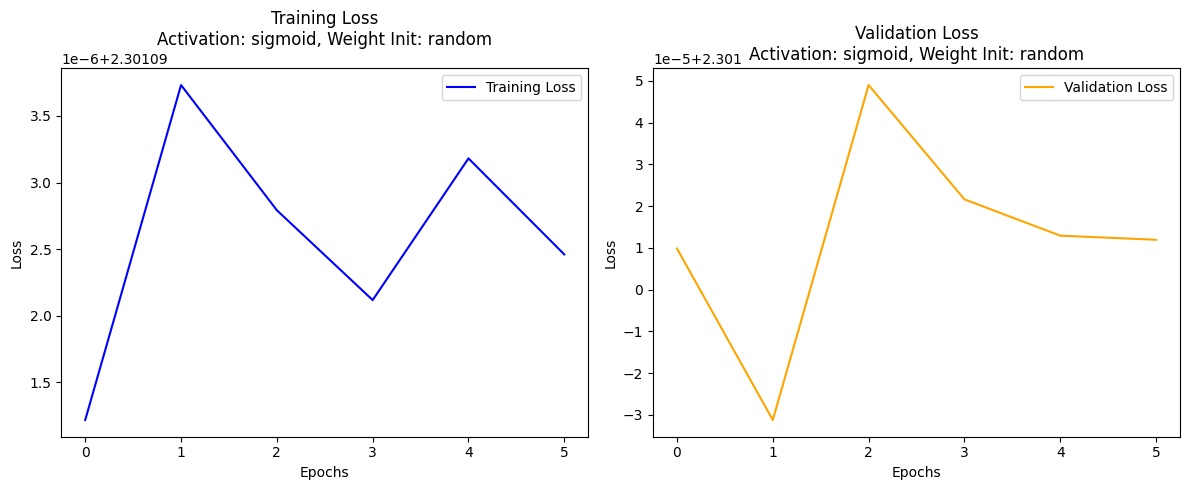

In [16]:

train_and_evaluate("sigmoid", "random")

Epoch 1/50 - Train Loss: 2.3010934459151904 - Validation Loss: 2.301017290001396
Epoch 2/50 - Train Loss: 2.301093487177776 - Validation Loss: 2.301000787962544
Epoch 3/50 - Train Loss: 2.3010925990905045 - Validation Loss: 2.3010370695041424
Epoch 4/50 - Train Loss: 2.3010911511391097 - Validation Loss: 2.3010071137512598
Epoch 5/50 - Train Loss: 2.3010919025106245 - Validation Loss: 2.3010314216551304
Epoch 6/50 - Train Loss: 2.3010924328309703 - Validation Loss: 2.3010238159665346
Early stopping due to no improvement in validation loss.
Final train losses for sigmoid, random: [2.3010934459151904, 2.301093487177776, 2.3010925990905045, 2.3010911511391097, 2.3010919025106245, 2.3010924328309703]
Final validation losses for sigmoid, random: [2.301017290001396, 2.301000787962544, 2.3010370695041424, 2.3010071137512598, 2.3010314216551304, 2.3010238159665346]


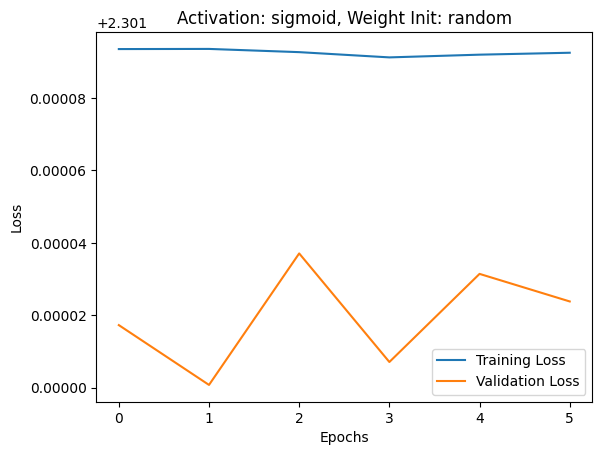

Epoch 1/50 - Train Loss: 2.2702981736012973 - Validation Loss: 2.270465343899534
Epoch 2/50 - Train Loss: 1.78564636841071 - Validation Loss: 1.7878209069444344
Epoch 3/50 - Train Loss: 1.1010593606453163 - Validation Loss: 1.1141476187572772
Epoch 4/50 - Train Loss: 0.722158484050716 - Validation Loss: 0.7648149234123294
Epoch 5/50 - Train Loss: 0.5126641869221731 - Validation Loss: 0.5908406849245593
Epoch 6/50 - Train Loss: 0.3777407458525208 - Validation Loss: 0.49232474589240943
Epoch 7/50 - Train Loss: 0.28812903629242637 - Validation Loss: 0.42767383013019183
Epoch 8/50 - Train Loss: 0.22837873582552226 - Validation Loss: 0.3897889442447632
Epoch 9/50 - Train Loss: 0.1880116687587888 - Validation Loss: 0.3678342824434386
Epoch 10/50 - Train Loss: 0.15942940124568156 - Validation Loss: 0.3554776333025302
Epoch 11/50 - Train Loss: 0.13775972492156743 - Validation Loss: 0.3485443536251068
Epoch 12/50 - Train Loss: 0.12055285579987804 - Validation Loss: 0.34377579491386495
Epoch 13/

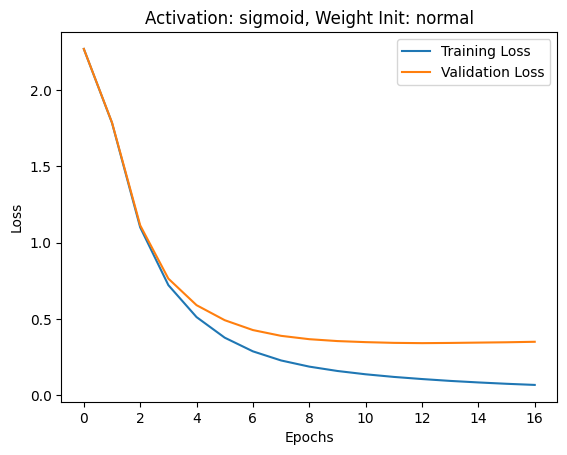

Epoch 1/50 - Train Loss: 2.301091745145419 - Validation Loss: 2.301038344866558
Epoch 2/50 - Train Loss: 2.3010911218359924 - Validation Loss: 2.301001168900431
Epoch 3/50 - Train Loss: 2.301091044953331 - Validation Loss: 2.3010115761806724
Epoch 4/50 - Train Loss: 2.3010915644930248 - Validation Loss: 2.3010258139735735
Epoch 5/50 - Train Loss: 2.301091999263569 - Validation Loss: 2.3010003404979202
Epoch 6/50 - Train Loss: 2.3010915953362847 - Validation Loss: 2.3010280041124274
Epoch 7/50 - Train Loss: 2.301091411159244 - Validation Loss: 2.300999619852973
Epoch 8/50 - Train Loss: 2.301090975012861 - Validation Loss: 2.3010188856725655
Epoch 9/50 - Train Loss: 2.30109155953725 - Validation Loss: 2.3010350471713186
Epoch 10/50 - Train Loss: 2.301091598583763 - Validation Loss: 2.301022011922038
Epoch 11/50 - Train Loss: 2.301092322555847 - Validation Loss: 2.3010355428941978
Early stopping due to no improvement in validation loss.
Final train losses for sigmoid, zero: [2.30109174514

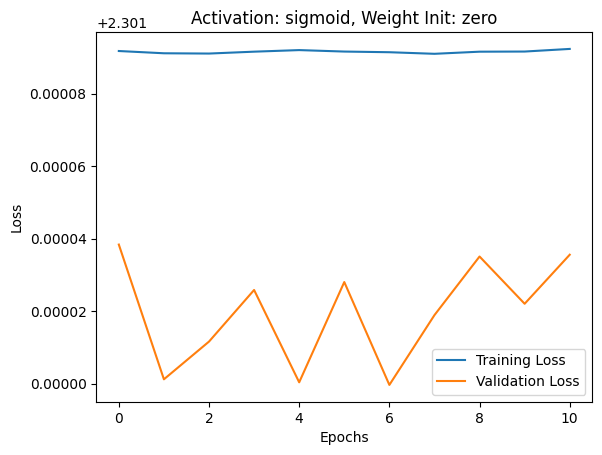

Epoch 1/50 - Train Loss: 2.301090612211631 - Validation Loss: 2.301014971024253
Epoch 2/50 - Train Loss: 2.301090610658834 - Validation Loss: 2.301016001988712
Epoch 3/50 - Train Loss: 2.3010905998626714 - Validation Loss: 2.301015966856532
Epoch 4/50 - Train Loss: 2.3010905972457745 - Validation Loss: 2.3010164273275726
Epoch 5/50 - Train Loss: 2.3010906035678818 - Validation Loss: 2.30101695219853
Early stopping due to no improvement in validation loss.
Final train losses for tanh, random: [2.301090612211631, 2.301090610658834, 2.3010905998626714, 2.3010905972457745, 2.3010906035678818]
Final validation losses for tanh, random: [2.301014971024253, 2.301016001988712, 2.301015966856532, 2.3010164273275726, 2.30101695219853]


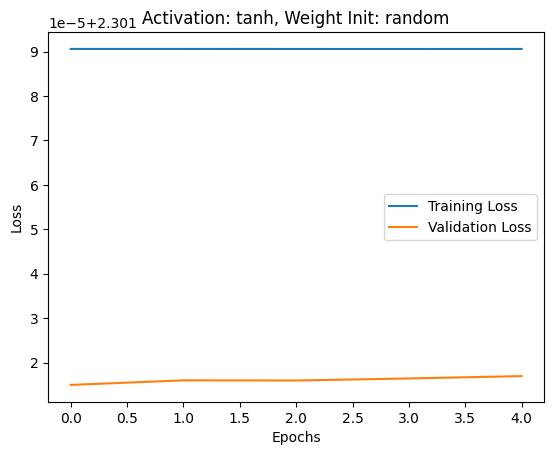

Epoch 1/50 - Train Loss: 0.09973872627135745 - Validation Loss: 0.17957806879456614
Epoch 2/50 - Train Loss: 0.040086353824963554 - Validation Loss: 0.16168822819727777
Epoch 3/50 - Train Loss: 0.02838497253674091 - Validation Loss: 0.16346069377565173
Epoch 4/50 - Train Loss: 0.02207567069687086 - Validation Loss: 0.166481335726967
Epoch 5/50 - Train Loss: 0.017758848843428106 - Validation Loss: 0.1698682611618461
Epoch 6/50 - Train Loss: 0.014718228803454234 - Validation Loss: 0.17269837765175264
Early stopping due to no improvement in validation loss.
Final train losses for tanh, normal: [0.09973872627135745, 0.040086353824963554, 0.02838497253674091, 0.02207567069687086, 0.017758848843428106, 0.014718228803454234]
Final validation losses for tanh, normal: [0.17957806879456614, 0.16168822819727777, 0.16346069377565173, 0.166481335726967, 0.1698682611618461, 0.17269837765175264]


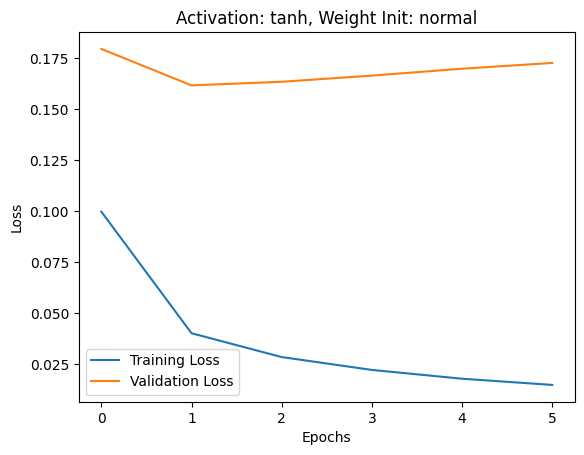

Epoch 1/50 - Train Loss: 2.3010913688513157 - Validation Loss: 2.301016020252947
Epoch 2/50 - Train Loss: 2.3010905960425165 - Validation Loss: 2.3010158993922576
Epoch 3/50 - Train Loss: 2.3010905953881697 - Validation Loss: 2.3010162959735596
Epoch 4/50 - Train Loss: 2.3010905950423153 - Validation Loss: 2.3010156549012963
Epoch 5/50 - Train Loss: 2.3010905954841223 - Validation Loss: 2.3010164767246755
Epoch 6/50 - Train Loss: 2.3010905948551006 - Validation Loss: 2.3010160625958136
Epoch 7/50 - Train Loss: 2.3010905982545746 - Validation Loss: 2.301016331386288
Epoch 8/50 - Train Loss: 2.3010905965865525 - Validation Loss: 2.3010159673982957
Early stopping due to no improvement in validation loss.
Final train losses for tanh, zero: [2.3010913688513157, 2.3010905960425165, 2.3010905953881697, 2.3010905950423153, 2.3010905954841223, 2.3010905948551006, 2.3010905982545746, 2.3010905965865525]
Final validation losses for tanh, zero: [2.301016020252947, 2.3010158993922576, 2.30101629597

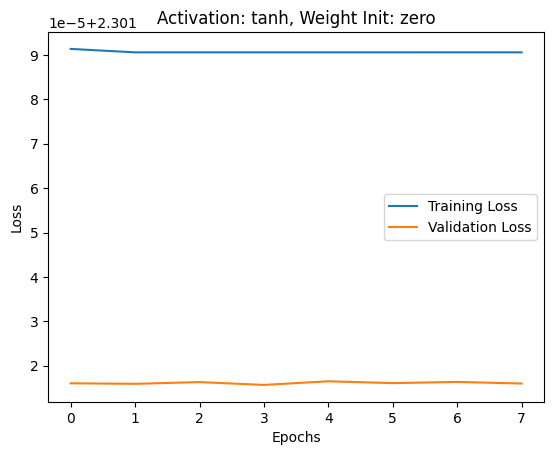

Epoch 1/50 - Train Loss: 2.301091394764658 - Validation Loss: 2.3010159093949873
Epoch 2/50 - Train Loss: 2.3010905965958157 - Validation Loss: 2.3010153266280593
Epoch 3/50 - Train Loss: 2.3010905956557415 - Validation Loss: 2.301016374034571
Epoch 4/50 - Train Loss: 2.301090595056955 - Validation Loss: 2.301016351558538
Epoch 5/50 - Train Loss: 2.301090596213705 - Validation Loss: 2.3010165105062157
Epoch 6/50 - Train Loss: 2.3010905973943174 - Validation Loss: 2.3010162194044086
Early stopping due to no improvement in validation loss.
Final train losses for relu, random: [2.301091394764658, 2.3010905965958157, 2.3010905956557415, 2.301090595056955, 2.301090596213705, 2.3010905973943174]
Final validation losses for relu, random: [2.3010159093949873, 2.3010153266280593, 2.301016374034571, 2.301016351558538, 2.3010165105062157, 2.3010162194044086]


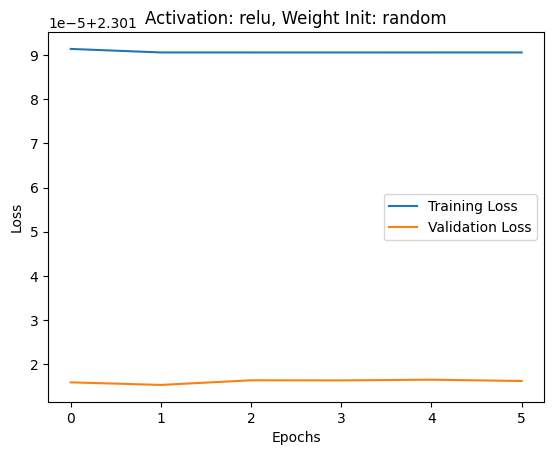

Epoch 1/50 - Train Loss: 0.006417498085678673 - Validation Loss: 0.19502636711462962
Epoch 2/50 - Train Loss: 0.0010868901233218311 - Validation Loss: 0.21825476707044672
Epoch 3/50 - Train Loss: 0.0005237469011251065 - Validation Loss: 0.23212517306668656
Epoch 4/50 - Train Loss: 0.0003291927624706418 - Validation Loss: 0.24055120385892304
Epoch 5/50 - Train Loss: 0.00023426871874004048 - Validation Loss: 0.24655903106934732
Early stopping due to no improvement in validation loss.
Final train losses for relu, normal: [0.006417498085678673, 0.0010868901233218311, 0.0005237469011251065, 0.0003291927624706418, 0.00023426871874004048]
Final validation losses for relu, normal: [0.19502636711462962, 0.21825476707044672, 0.23212517306668656, 0.24055120385892304, 0.24655903106934732]


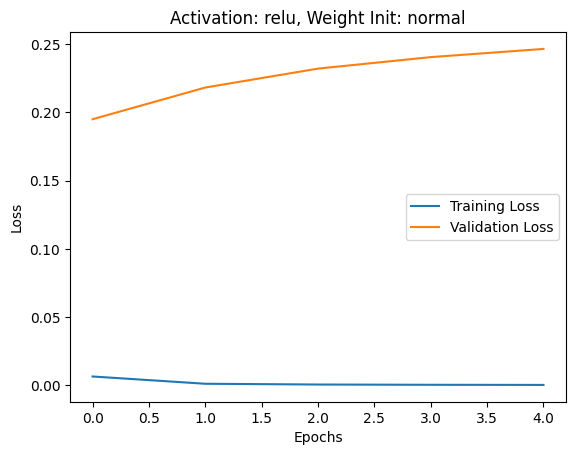

Epoch 1/50 - Train Loss: 2.3010913415567726 - Validation Loss: 2.301015881680663
Epoch 2/50 - Train Loss: 2.301090595220389 - Validation Loss: 2.301015987858618
Epoch 3/50 - Train Loss: 2.3010905983820074 - Validation Loss: 2.301016729265244
Epoch 4/50 - Train Loss: 2.3010905952088008 - Validation Loss: 2.3010160104642505
Epoch 5/50 - Train Loss: 2.301090595172586 - Validation Loss: 2.3010164612072503
Early stopping due to no improvement in validation loss.
Final train losses for relu, zero: [2.3010913415567726, 2.301090595220389, 2.3010905983820074, 2.3010905952088008, 2.301090595172586]
Final validation losses for relu, zero: [2.301015881680663, 2.301015987858618, 2.301016729265244, 2.3010160104642505, 2.3010164612072503]


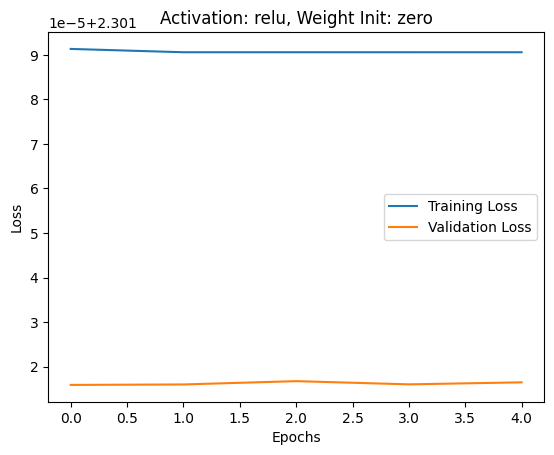

Epoch 1/50 - Train Loss: 1.7300785329760653 - Validation Loss: 1.7387872311318537
Epoch 2/50 - Train Loss: 1.3983604964796905 - Validation Loss: 1.4189073842961024
Epoch 3/50 - Train Loss: 1.1908160277848518 - Validation Loss: 1.2287594042369567
Epoch 4/50 - Train Loss: 1.0403309336353963 - Validation Loss: 1.1104507001138937
Epoch 5/50 - Train Loss: 0.9077143628894995 - Validation Loss: 1.0180484258901772
Epoch 6/50 - Train Loss: 0.75038563685627 - Validation Loss: 0.8901650047439509
Epoch 7/50 - Train Loss: 0.6416550169515673 - Validation Loss: 0.8206499995294647
Epoch 8/50 - Train Loss: 0.5981789187701816 - Validation Loss: 0.8016356362173103
Epoch 9/50 - Train Loss: 0.20006025501248056 - Validation Loss: 0.44507012398581597
Epoch 10/50 - Train Loss: 0.11871659232211633 - Validation Loss: 0.40313653778504144
Epoch 11/50 - Train Loss: 0.077281203522499 - Validation Loss: 0.3886460130766737
Epoch 12/50 - Train Loss: 0.051498021675545784 - Validation Loss: 0.4117510905643956
Epoch 13/5

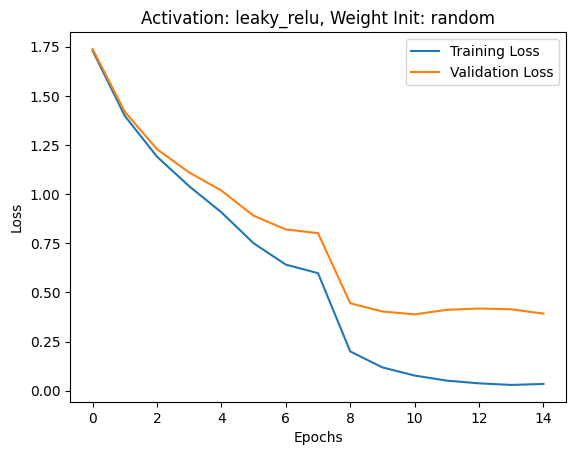

Epoch 1/50 - Train Loss: 0.006441960223054034 - Validation Loss: 0.168998338913595
Epoch 2/50 - Train Loss: 0.0011451426406386932 - Validation Loss: 0.19420306558062256
Epoch 3/50 - Train Loss: 0.0005183641725103513 - Validation Loss: 0.2066017018531448
Epoch 4/50 - Train Loss: 0.00032201955282154575 - Validation Loss: 0.213647755452434
Epoch 5/50 - Train Loss: 0.00022727790909930182 - Validation Loss: 0.21869153942273867
Early stopping due to no improvement in validation loss.
Final train losses for leaky_relu, normal: [0.006441960223054034, 0.0011451426406386932, 0.0005183641725103513, 0.00032201955282154575, 0.00022727790909930182]
Final validation losses for leaky_relu, normal: [0.168998338913595, 0.19420306558062256, 0.2066017018531448, 0.213647755452434, 0.21869153942273867]


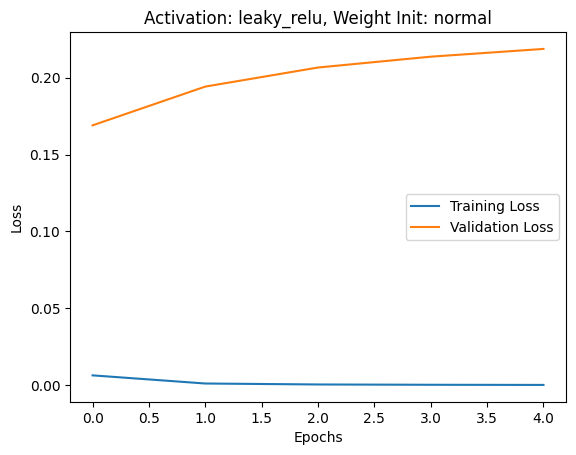

Epoch 1/50 - Train Loss: 2.3010913610550197 - Validation Loss: 2.301016942057498
Epoch 2/50 - Train Loss: 2.301090594735123 - Validation Loss: 2.3010163161501485
Epoch 3/50 - Train Loss: 2.3010905944674183 - Validation Loss: 2.301015885308028
Epoch 4/50 - Train Loss: 2.3010905957248173 - Validation Loss: 2.301015168858349
Epoch 5/50 - Train Loss: 2.3010905956223446 - Validation Loss: 2.3010161759572636
Epoch 6/50 - Train Loss: 2.3010905949574743 - Validation Loss: 2.301015790546289
Epoch 7/50 - Train Loss: 2.3010905951348395 - Validation Loss: 2.3010159548370774
Epoch 8/50 - Train Loss: 2.3010905958524277 - Validation Loss: 2.3010165775744054
Early stopping due to no improvement in validation loss.
Final train losses for leaky_relu, zero: [2.3010913610550197, 2.301090594735123, 2.3010905944674183, 2.3010905957248173, 2.3010905956223446, 2.3010905949574743, 2.3010905951348395, 2.3010905958524277]
Final validation losses for leaky_relu, zero: [2.301016942057498, 2.3010163161501485, 2.301

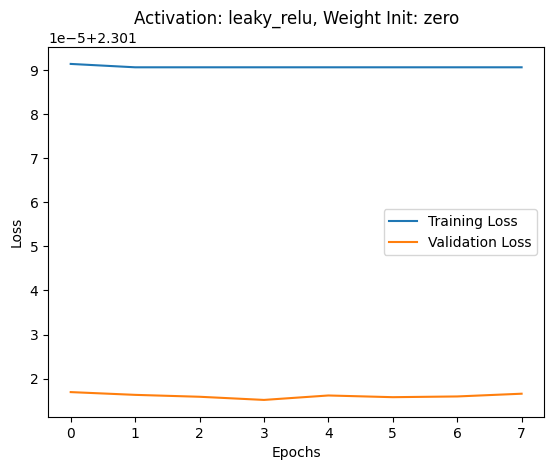

In [13]:
for config in configurations:
    train_and_evaluate_model(config['activation'], config['weight_init'])

In [ ]:
from sklearn.metrics import accuracy_score
import pickle
import numpy as np

model_filenames = [
    'model_activation_leaky_relu_weight_init_zero.pkl',
    'model_activation_leaky_relu_weight_init_normal.pkl',
    'model_activation_leaky_relu_weight_init_random.pkl',
    'model_activation_relu_weight_init_zero.pkl',
    'model_activation_relu_weight_init_normal.pkl',
    'model_activation_relu_weight_init_random.pkl',
    'model_activation_tanh_weight_init_zero.pkl',
    'model_activation_tanh_weight_init_normal.pkl',
    'model_activation_tanh_weight_init_random.pkl',
    'model_activation_sigmoid_weight_init_zero.pkl',
    'model_activation_sigmoid_weight_init_normal.pkl',
    'model_activation_sigmoid_weight_init_random.pkl'
]

# Iterate over each model file and calculate accuracy
for filename in model_filenames:
    with open(filename, 'rb') as file:
        model = pickle.load(file)
    
    val_probs = model.predict_proba(X_test)  # Assuming predict_proba method returns probabilities
    val_pred = np.argmax(val_probs, axis=1)  # Get the class with highest probability
    
    # Convert one-hot encoded Y_val to class labels if needed
    Y_val_labels = np.argmax(Y_test, axis=1) if Y_test.ndim > 1 else Y_test
    
    # Calculate accuracy using sklearn's accuracy_score
    accuracy = accuracy_score(Y_val_labels, val_pred)
    print(f"Model {filename} - test Accuracy: {accuracy * 100:.2f}%")


Model model_activation_leaky_relu_weight_init_zero.pkl - test Accuracy: 10.67%
Model model_activation_leaky_relu_weight_init_normal.pkl - test Accuracy: 96.23%
Model model_activation_leaky_relu_weight_init_random.pkl - test Accuracy: 94.13%
Model model_activation_relu_weight_init_zero.pkl - test Accuracy: 10.67%
Model model_activation_relu_weight_init_normal.pkl - test Accuracy: 96.17%
Model model_activation_relu_weight_init_random.pkl - test Accuracy: 10.67%
Model model_activation_tanh_weight_init_zero.pkl - test Accuracy: 10.67%
Model model_activation_tanh_weight_init_normal.pkl - test Accuracy: 94.40%
Model model_activation_tanh_weight_init_random.pkl - test Accuracy: 10.67%
Model model_activation_sigmoid_weight_init_zero.pkl - test Accuracy: 10.67%
Model model_activation_sigmoid_weight_init_normal.pkl - test Accuracy: 91.02%
Model model_activation_sigmoid_weight_init_random.pkl - test Accuracy: 10.67%
